### Geog 172: ANOVA, Correlation, Regression (Lab 5)Due on December 9, 2020before 9.30 am

By Jack Holbrook, Wednesday section, Greenbeg, 12/8/2020. 

![title](img/p1lab5.PNG)

Question 1:

    Assume that an analysis of variance is conducted for a study where there are N = 50 observations and k = 5 categories. Fill in the blanks in the following ANOVA table:

In [ ]:
# Source:     	SS  	DF      	MS      	F
# group: 	SST 	k−1 	SST/(k−1) 	MST/MSE
# Error:	SSE 	N−k 	SSE/(N−k)
# Total: SST + SSE, 

In [1]:
#given:
N = 50
k = 5

#group:
groupDF = k-1
groupMS = 116.3
groupSS = groupMS * (k-1)
groupMS = groupSS / (k-1)  # is simply the inverse
print("group SS = " +str(groupSS))
print("group SS = " +str(groupMS))
print("group DF = " +str(groupDF))

#error:
errorDF = N-k
ErrorSS = 2000
errorMs = ErrorSS/ errorDF
Fstat = groupMS / errorMs
print("error sum of squares = " + str(2000))
print("error DF = " +str(errorDF))
print("error DF = " +str(errorMs))
print("group F stat = " +str(Fstat))

#total:
print("total SS = " +str(ErrorSS + groupSS))
print("totsl DF = " +str(groupDF + errorDF))

group SS = 465.2
group SS = 116.3
group DF = 4
error sum of squares = 2000
error DF = 45
error DF = 44.44444444444444
group F stat = 2.61675
total SS = 2465.2
totsl DF = 49


Question 2: Caffeine Problem.

Does the mean amount of nectar taken depend on the concentration of caffeine in the nectar? Carry out ANOVA step by step in the following subsections:

a.State the null and alternate hypotheses appropriate to this question.
b.Calculated the following summary statistics for each group: sample size, sample mean, sample standard deviation.
c.What is the error mean square?
d.How many degrees of freedom are associated with errormean square?e.Calculate the estimate of the grand mean.
f.Calculate the group sum of squares.
g.Calculate the group degrees of freedom and the group mean square.
h.What is F for this example?
i.Find the P-value for this test?
j.Report your results in an ANOVA tab;e

In [2]:
# data:
import numpy as np
        # this was just copied from the worksheet
ppm50 =  [-0.4, 0.34, 0.19, 0.05, -0.14]
ppm100 = [0.01, -0.39, -0.08, -0.09, -0.31]
ppm150 = [0.65, 0.53, 0.39, -0.15, 0.46]
ppm200 = [0.24, 0.44, 0.13, 1.03, 0.05]

A:
    Null Hypothesis: there will be no relationship between the caffeine concentration in each feeder than the difference in consumption between the caffeinated feeders and the non caffeinated feeders. 
    
    Alternate Hypothesis: There will be a correlation between the concentration in caffeine from each of the non control feeders and the the feeders.The difference in consumption between the two sets will change predictabley with the changing concentration in caffeine. 

In [3]:
# B:
#cast to array
ppm50 = np.array(ppm50) 
ppm100= np.array(ppm100) 
ppm150= np.array(ppm150) 
ppm200= np.array(ppm200) 

# sample size for each group
print(len(ppm50))  
print(len(ppm100))
print(len(ppm150))
print(len(ppm200))

# sample means for each group:
print(sum(ppm50)/len(ppm50))
print(sum(ppm100)/len(ppm100))
print(sum(ppm150)/len(ppm150))
print(sum(ppm200)/len(ppm200))

# Sample standard deviations for each group:
print(ppm50.std())
print(ppm100.std())
print(ppm150.std())
print(ppm200.std())

5
5
5
5
0.007999999999999997
-0.17200000000000001
0.37600000000000006
0.378
0.2582556872558667
0.15157836257197133
0.2766658634526493
0.3513061343045407


In [7]:
import pandas as pd
# begin by concating arrays to simplify calculations:
ppmtot = np.concatenate((ppm50, ppm100, ppm150, ppm200), axis=0)
values = (['ppm50'] * len(ppm50)) + (['ppm100']*len(ppm100)) + (['ppm150'] * len(ppm150)) + (['ppm200']*len(ppm200))
caffeine = pd.DataFrame({'features': values, 'concentration': ppmtot})
grandmean = caffeine['concentration'].mean()
caffeine['grandmean'] = grandmean
print(grandmean)
caffeine

0.14750000000000002


,features,concentration,grandmean
0,ppm50,-0.40,0.1475
1,ppm50,0.34,0.1475
2,ppm50,0.19,0.1475
3,ppm50,0.05,0.1475
4,ppm50,-0.14,0.1475
5,ppm100,0.01,0.1475
6,ppm100,-0.39,0.1475
7,ppm100,-0.08,0.1475
8,ppm100,-0.09,0.1475
9,ppm100,-0.31,0.1475


In [16]:
# compute the sum of squares error:
sstotal = sum((caffeine['concentration'] -caffeine['grandmean'])**2)
sstotal
# now get the sum of squares error:
groupmeans = caffeine.groupby('features').mean()
groupmeans = groupmeans.rename(columns ={'concentration':'groupmean'})
groupmeans

# add data to original data frame


# add group means and overall mean to the original data frame
caffeine = caffeine.merge(groupmeans, left_on = 'features', right_index = True)
caffeine


,features,concentration,grandmean_x,groupmean,grandmean_y
0,ppm50,-0.40,0.1475,0.008,0.1475
1,ppm50,0.34,0.1475,0.008,0.1475
2,ppm50,0.19,0.1475,0.008,0.1475
3,ppm50,0.05,0.1475,0.008,0.1475
4,ppm50,-0.14,0.1475,0.008,0.1475
5,ppm100,0.01,0.1475,-0.172,0.1475
6,ppm100,-0.39,0.1475,-0.172,0.1475
7,ppm100,-0.08,0.1475,-0.172,0.1475
8,ppm100,-0.09,0.1475,-0.172,0.1475
9,ppm100,-0.31,0.1475,-0.172,0.1475


In [17]:
caffeine
sserror = sum((caffeine['concentration'] - caffeine['groupmean'])**2)
print(sstotal)
print(sserror)
ssgroup = sstotal-sserror
print(ssgroup)

2.5825750000000003
1.4481600000000001
1.1344150000000002


In [18]:
#C: 
#Error mean square:
errorDF = 20-1
k = 4
errorMS = sserror/ errorDF
errorMS  # gives the error mean square

0.07621894736842105

#D:
The sample size is 20 in total, and the error degrees of freedom is the sample size N - 1, so 20 - 1 is 19 so the errorDF == 19. 

#E:
The grand mean is the the sum of all the means form all the groups. The calculation for the grand mean is done 5 cells above, it is the mean of each grouped mean. for this data the grand mean calcualtedf from each individual record is the same as the grand mean calculated from each aggregated group mean. The grand mean value is 0.147 in difference between the caffenaited stations and the non caffeinated stations. 

#F:
The group sum of squares is 1.1344, it is calculated 3 code cdells above. 

#G:
The group degrees of freedom is the total number of responding groups which in this scenario is four groups. 

In [19]:
#H:
GroupMS = ssgroup / (k-1)
Fstat = GroupMS / errorMS
print("group F stat = " +str(Fstat))
print(GroupMS)

group F stat = 4.961211698523185
0.3781383333333334


#I:
Using the table with the F statistic, the numerator at 4, and the denominator at 20, the calculated p value is significant at p < 0.02

In [ ]:
# J
#### recap: full ANOVA table:
# Source:     	SS  	DF      	MS      	F                                            
# group: 	 SS  	DF      	MS      	F
        1.134415      4       0.3781383    3.720908773892388
# Error: 	 SS  	DF      	MS     
        1.44816,    19   .07621894736842105
# Total: 
  2.5825750000000003                 
    
    # completed ANOVA table

Question 3:
Question considering correlation in hyena age and giggle fequency in hertz. 

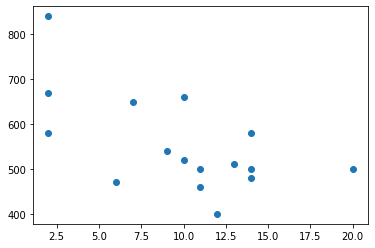

In [88]:
# Question 3

age = [2,2,2,6,9,10,13,10,14,14,12,7,11,11,14,20]
freqHrz = [840, 670, 580, 470, 540, 660, 510, 520, 500, 480, 400, 650, 460, 500, 580, 500]

plt.scatter(age, freqHrz)
# this suggests a negative association, that frequency decreases with age. 

In [24]:
#B:
globalmeanage  =(sum(age)/len(age))
globalmeanfreq =(sum(freqHrz)/len(freqHrz))
hyenas = pd.DataFrame({'age': age, 'freqhrz': freqHrz, 'meanage':globalmeanage, 'meanhrz': globalmeanfreq})
hyenas
sshyenaAge = sum((hyenas['age']-hyenas['meanage'])**2)
sshyenaAge

380.4375

In [27]:
#C:
sshyenafrz = sum((hyenas['freqhrz']-hyenas['meanhrz'])**2)
sshyenafrz

174175.0

In [28]:
#D:
hyenas
sumprod = sum((hyenas['age']-(hyenas['meanage']))*(hyenas['freqhrz'] - (hyenas['meanhrz'])))
sumprod

-4898.75

In [31]:
#E:
b = sumprod / sshyenaAge
r = sumprod / ((sshyenaAge**(1/2))*(sshyenafrz**(1/2)))
r
# correlation coefficient is -0.60179795461996

-0.60179795461996

In [46]:
#F
# computed fischer's z transformation

def ztransform(r):
    z = (1/2)*(np.log(1+r)-np.log(1-r))
    return z
ztransform(r)

-0.6959612353906193

In [71]:
# G:
# computing the standard error
((1-(z*z)/(16-2))**(1/2))
# coputing the standard error of sampling distribution:
sigma = ((1/16-3)**(1/2))
sigma+100

(100+1.713913650100261j)

In [ ]:
# H:
Zcrit = -1.645
# at alpha = .05, the Z critical vlaue is -1.645. 

In [78]:
# I:
r_ = (1+r)/1.6017979546199599
z2=0.5*np.log(r_)#
z2

low = z2-(1.96*(sigma))
high = z2+(1.96*(sigma))

print(low)
print(high)

print(str(low)+"<Z<"+str(high))

(-0.6959612353906195-3.3592707541965114j)
(-0.695961235390619+3.3592707541965114j)
(-0.6959612353906195-3.3592707541965114j)<Z<(-0.695961235390619+3.3592707541965114j)


In [ ]:
# J:


In [94]:
# question #4:

precipitationBoston = {
"Year": ["Sat","Sun", "Mon", "Tue", "Wed", "Thur", "Fri"],
"II1971": [0.83, 3.14, 4.20, 1.28, 1.16, 4.25, 2.08],
"I1972": [4.66, 4.15, 3.40, 1.74, 3.91, 5.15, 5.06],
"II1972":  [3.03, 5.80, 2.29, 3.17, 3.50, 3.40, 3.04],
"I1973":  [3.69, 3.72, 4.29, 2.06, 3.04, 2.30, 4.26],
"II1973":  [2.35, 3.62, 3.56, 2.27, 4.46, 2.52, 3.36],
"I1974":  [3.18, 3.28, 1.82, 3.75, 2.07, 3.54, 2.27],
    
    }
#precipitationBoston.values[0]

for key, value in precipitationBoston.items():
    print(key, value)
    
df = pd.DataFrame(precipitationBoston, columns = ['Year',"II1971", "I1972","II1972", "I1973", "II1973", "I1974"])

Year ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
II1971 [0.83, 3.14, 4.2, 1.28, 1.16, 4.25, 2.08]
I1972 [4.66, 4.15, 3.4, 1.74, 3.91, 5.15, 5.06]
II1972 [3.03, 5.8, 2.29, 3.17, 3.5, 3.4, 3.04]
I1973 [3.69, 3.72, 4.29, 2.06, 3.04, 2.3, 4.26]
II1973 [2.35, 3.62, 3.56, 2.27, 4.46, 2.52, 3.36]
I1974 [3.18, 3.28, 1.82, 3.75, 2.07, 3.54, 2.27]


In [111]:
df.set_index('Year')
# compute the mean for each weekday
print(df.mean(axis=1))
# compute the std for each weekday
print(df.std(axis=1))

0    2.956667
1    3.951667
2    3.260000
3    2.378333
4    3.023333
5    3.526667
6    3.345000
dtype: float64
0    1.295001
1    0.972552
2    1.006837
3    0.920335
4    1.221354
5    1.067027
6    1.151308
dtype: float64


In [116]:
# ANOVA
grandmean = df.mean()
# Source:     	SS  	DF      	MS      	F
# group: 	SST 	k−1 	SST/(k−1) 	MST/MSE
# Error:	SSE 	N−k 	SSE/(N−k)
# Total: SST + SSE, 

In [99]:
precipitationPittsburg = {
"Year": ["Sat","Sun", "Mon", "Tue", "Wed", "Thur", "Fri"],
"II1971": [1.64,5.55,3.19,2.45,1.44,1.07,1.66],
"I1972": [2.20,3.37,0.78,2.63,2.32,5.57,2.80],
"II1972":  [2.75, 1.72,2.34,3.40,3.68,3.48,2.50],
"I1973":  [2.23,4.31,2.02,1.83,4.35,4.07,2.66],
"II1973":  [3.65,2.66,3.95,2.31,1.85,2.63,1.11],
"I1974":  [4.96,3.00, 2.61,1.75,2.70,2.45,4.06], 
    }

df2 = pd.DataFrame(precipitationPittsburg, columns = ['Year',"II1971", "I1972","II1972", "I1973", "II1973", "I1974"])

In [112]:
df2.set_index('Year')
# compute the mean for each weekday
print(df2.mean(axis=1))
# compute the std for each weekday
print(df2.std(axis=1))

0    2.905000
1    3.435000
2    2.481667
3    2.395000
4    2.723333
5    3.211667
6    2.465000
dtype: float64
0    1.212844
1    1.339713
2    1.077319
3    0.601789
4    1.107622
5    1.541148
6    1.017797
dtype: float64


In [115]:
# ANOVA:
grandmean = df2.mean()
# Source:     	SS  	DF      	MS      	F
# group: 	SST 	k−1 	SST/(k−1) 	MST/MSE
# Error:	SSE 	N−k 	SSE/(N−k)
# Total: SST + SSE, 

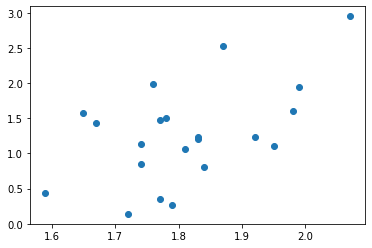

In [82]:
# Question #5:

facedim = [1.59, 1.67, 1.65, 1.72, 1.79, 1.77, 1.74, 1.74, 1.77, 1.78, 1.76, 1.81, 1.83, 1.83, 1.84, 1.87, 1.92, 1.95, 1.98, 1.99, 2.07]
penaltyMin = [.44, 1.43, 1.57, .14, .27, .35, .85, 1.13, 1.47, 1.51, 1.99, 1.06, 1.20, 1.23, .8, 2.53, 1.23, 1.1, 1.61, 1.95, 2.95]
#len(penaltyMin)
plt.scatter(facedim, penaltyMin)

#B:
   The scater plot seems to yield some correlation between the face dimensions and the penalty minutes per game, the events seem positivly correlated where athlete with a bigger face seem to incur more penalty minutes per game.  

In [83]:
#C:
facedim = np.array(facedim)
penaltyMin = np.array(penaltyMin)

# show varibale means
print(facedim.mean())
print(penaltyMin.mean())

1.812857142857143
1.2766666666666666


In [87]:
#D && E:
facedim = facedim.reshape(-1, 1)
penaltyMin = penaltyMin.reshape(-1, 1)

# calculating the estimate of the regression slope and the estimate of the intercept 
lin = LinearRegression()
lin.fit(facedim, penaltyMin)

print(lin.coef_)      # A parameter
print(lin.intercept_) # B parameter

#yes an increase of 3 minute penalty time makes sense for the increase of 1 unit face size. 
A =lin.coef_
B = lin.intercept_

[[3.18898271]]
[-4.50450342]


In [90]:
def yAxBline(A, B):
    '''draws a line over the scatterplot that takes
    the line's slope and intercept as arguments'''
    getaxis = plt.gca()
    x = np.array(getaxis.get_xlim())
    y = B + A * x
    plt.plot(x, y, '--')

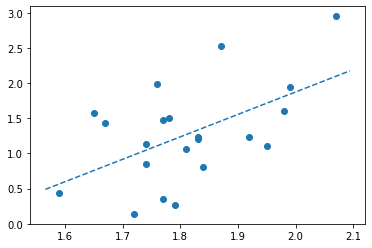

In [92]:
plt.scatter(facedim, penaltyMin)
yAxBline(3.18898271, -4.50450342)

In [113]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols